In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
%matplotlib inline

In [44]:
import yfinance as yf

In [45]:
sensex=yf.download("^BSESN",start="2021-01-01")

[*********************100%%**********************]  1 of 1 completed


In [46]:
sensex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,47785.281250,47984.359375,47771.148438,47868.980469,47868.980469,82700
2021-01-04,48109.171875,48220.468750,47594.468750,48176.800781,48176.800781,13900
2021-01-05,48037.628906,48486.238281,47903.378906,48437.781250,48437.781250,12200
2021-01-06,48616.660156,48616.660156,47864.140625,48174.058594,48174.058594,22500
2021-01-07,48524.359375,48558.339844,48037.871094,48093.320312,48093.320312,18400


<Axes: xlabel='Date'>

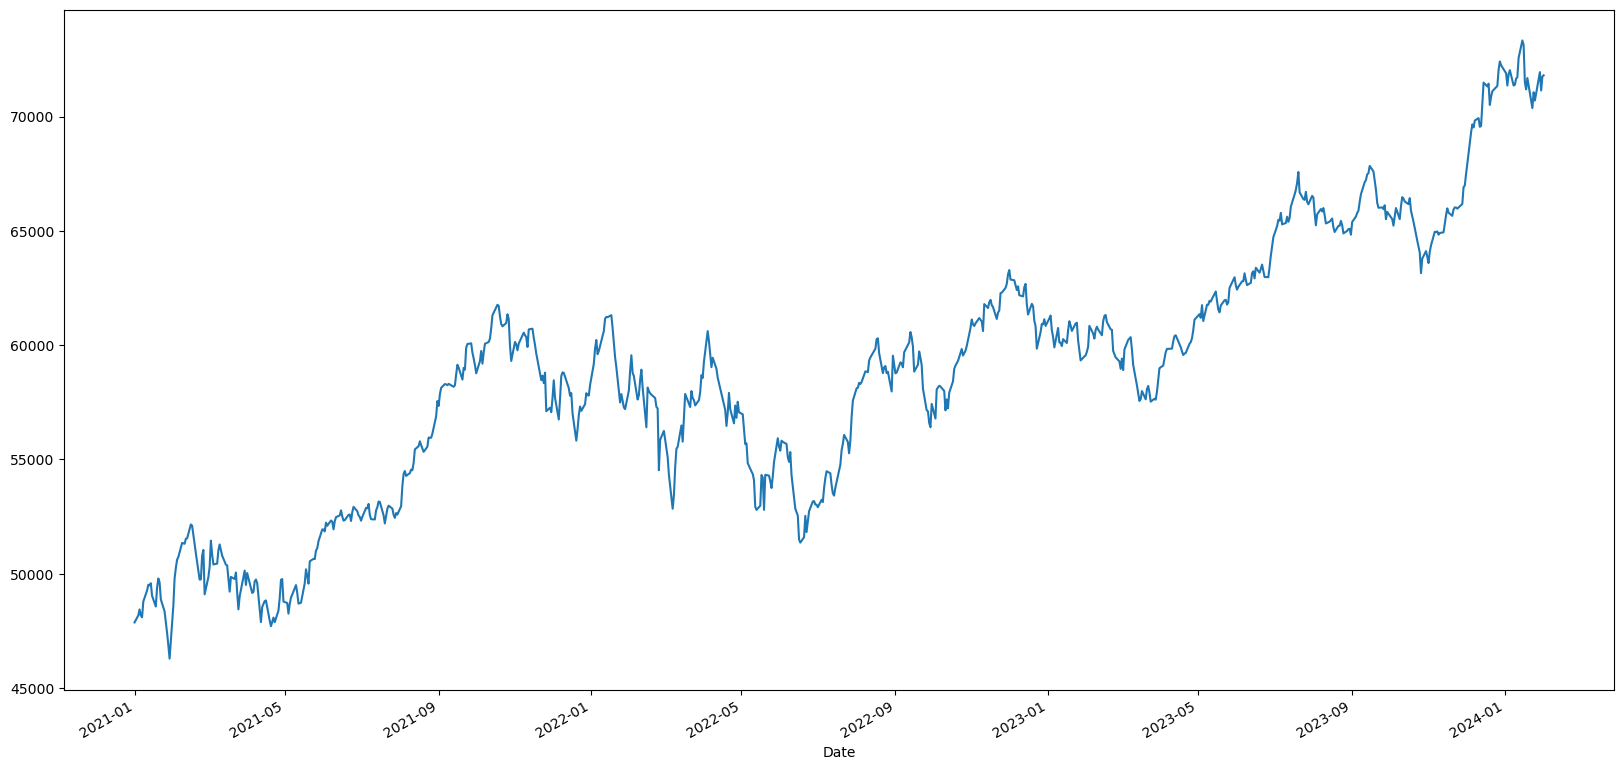

In [47]:
# Stock MArket data line plot is used
sensex.Close.plot(figsize=(20,10))

In [48]:
print(sensex.Close.describe())
print("Skewness",sensex.Close.skew())
print("Kurtosis",sensex.Close.kurt())

count      761.000000
mean     58783.851203
std       5721.070173
min      46285.769531
25%      54492.839844
50%      59037.179688
75%      61932.468750
max      73327.937500
Name: Close, dtype: float64
Skewness 0.13328083851748154
Kurtosis -0.3525179551877651


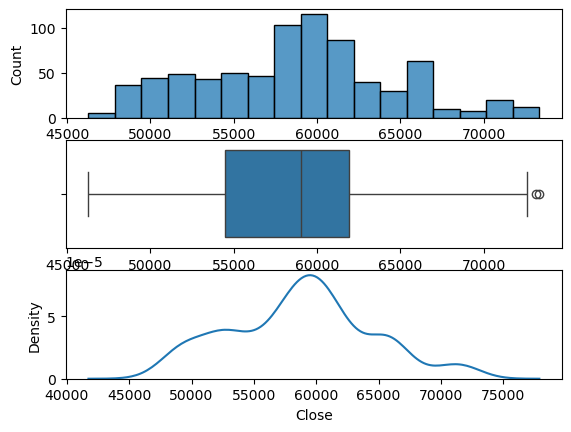

In [49]:
# Hiistogram, boxplot and density curve of sensex
fig,ax=plt.subplots(3,1)
sns.histplot(sensex.Close,ax=ax[0])
sns.boxplot(sensex.Close,ax=ax[1],orient='h')
sns.kdeplot(sensex.Close,ax=ax[2])
plt.show()

In [50]:
sensex_daily_return=sensex.Close.pct_change()

<Axes: xlabel='Date'>

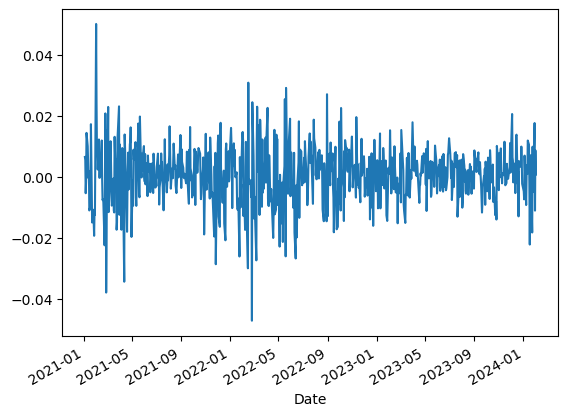

In [51]:
sensex_daily_return.plot()

In [52]:
sensex_weekly_return=sensex.Close.resample("W").ffill().pct_change()

<Axes: xlabel='Date'>

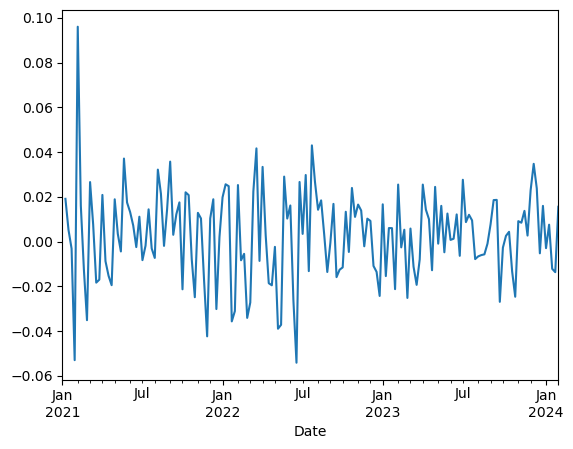

In [53]:
sensex_weekly_return.plot()

In [54]:
sensex_monthly_return=sensex.Close.resample("M").ffill().pct_change()

<Axes: xlabel='Date'>

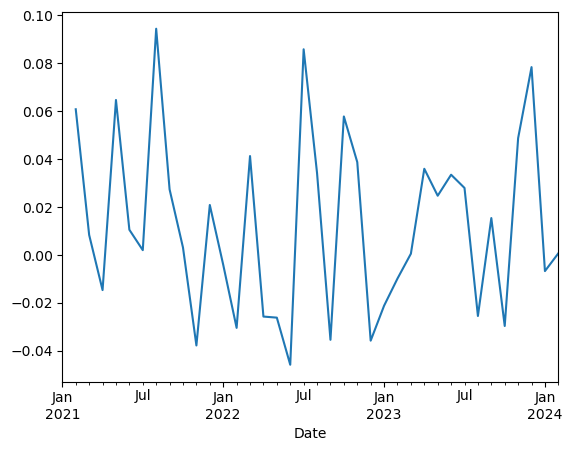

In [55]:
sensex_monthly_return.plot()

In [56]:
sensex_quaterly_return=sensex.Close.resample("Q").ffill().pct_change()

<Axes: xlabel='Date'>

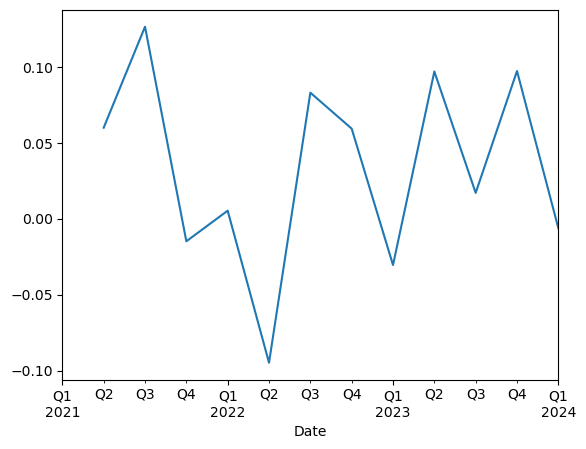

In [57]:
sensex_quaterly_return.plot()

In [58]:
sensex_annual_return=sensex.Close.resample("A").ffill().pct_change()

<Axes: xlabel='Date'>

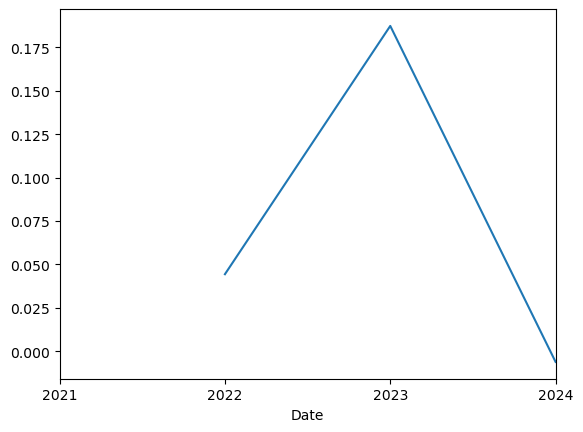

In [59]:
sensex_annual_return.plot()

In [60]:
sensex_annual_return

Date
2021-12-31         NaN
2022-12-31    0.044408
2023-12-31    0.187367
2024-12-31   -0.006097
Freq: A-DEC, Name: Close, dtype: float64

In [61]:
sensex_daily_return.describe()

count    760.000000
mean       0.000577
std        0.009335
min       -0.047214
25%       -0.004449
50%        0.000655
75%        0.006271
max        0.050012
Name: Close, dtype: float64

In [62]:
# cuimulative return - how much return or 1 rupee investment will be valued at
sensex_cumulative_return=(sensex_daily_return+1).cumprod()

<Axes: xlabel='Date'>

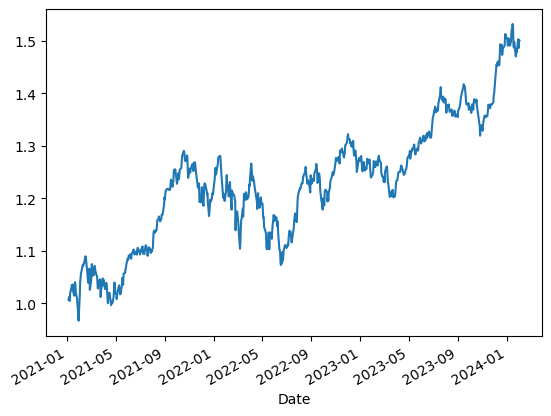

In [63]:
sensex_cumulative_return.plot()

In [64]:
# multiple Stocks
tickers={'^NSEI','TCS.BO','RELIANCE.BO','HDFCBANK.BO','MARUTI.BO','HINDUNILVR.BO','LT.BO','BHARTIARTL.BO','^BSESN'}

In [65]:
stocks=yf.download(tickers,start="2021-01-01")['Close']

[*********************100%%**********************]  9 of 9 completed


<Axes: xlabel='Date'>

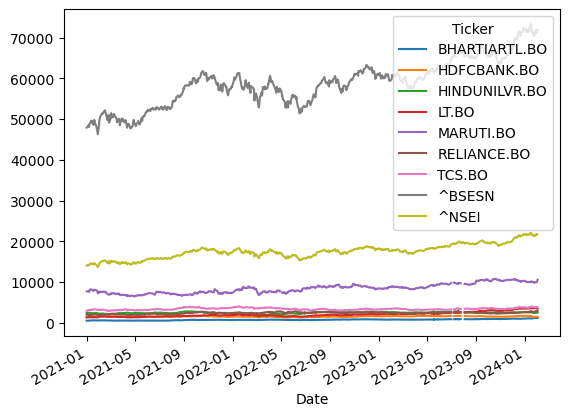

In [66]:
stocks.plot()

In [67]:
stocks.describe()

Ticker,BHARTIARTL.BO,HDFCBANK.BO,HINDUNILVR.BO,LT.BO,MARUTI.BO,RELIANCE.BO,TCS.BO,^BSESN,^NSEI
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,761.000000,761.000000
mean,740.114900,1526.324496,2457.131342,2028.827518,8381.192671,2391.138522,3392.215975,58783.845526,17496.368206
std,137.617510,97.054613,170.724530,557.990273,1127.823392,216.055035,239.382324,5721.057242,1723.321120
min,508.000000,1281.150024,1943.199951,1296.750000,6459.799805,1843.150024,2896.050049,46285.769531,13634.599609
25%,667.799988,1462.250000,2348.649902,1615.500000,7426.299805,2284.899902,3207.149902,54492.839844,16266.150391
50%,731.549988,1521.750000,2484.000000,1883.800049,8422.099609,2421.000000,3354.250000,59037.179688,17558.900391
75%,819.450012,1607.150024,2580.300049,2215.000000,9088.299805,2548.199951,3555.949951,61932.468750,18385.300781
max,1190.449951,1727.199951,2812.050049,3708.350098,10792.000000,2896.149902,4019.100098,73327.937500,22097.449219


In [68]:
stocks.tail()

Ticker,BHARTIARTL.BO,HDFCBANK.BO,HINDUNILVR.BO,LT.BO,MARUTI.BO,RELIANCE.BO,TCS.BO,^BSESN,^NSEI
Date,,,,,,,,,
2024-01-25,1159.849976,1435.300049,2430.100098,3591.699951,9886.799805,2710.350098,3808.199951,70700.671875,21352.599609
2024-01-29,1162.050049,1455.650024,2444.399902,3708.350098,9993.500000,2896.149902,3801.350098,71941.570312,21737.599609
2024-01-30,1158.300049,1444.199951,2458.949951,3633.399902,9957.250000,2814.850098,3799.100098,71139.898438,21522.099609
2024-01-31,1170.699951,1462.250000,2480.399902,3480.149902,10183.299805,2853.199951,3814.750000,71752.109375,21725.699219
2024-02-01,1158.400024,1465.750000,2489.800049,3400.000000,10572.549805,2856.750000,3875.649902,71795.476562,NaN


In [69]:
stocks_return=stocks.pct_change()

C:\Users\pisup\AppData\Local\Temp\ipykernel_12964\571901395.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



<Axes: xlabel='Date'>

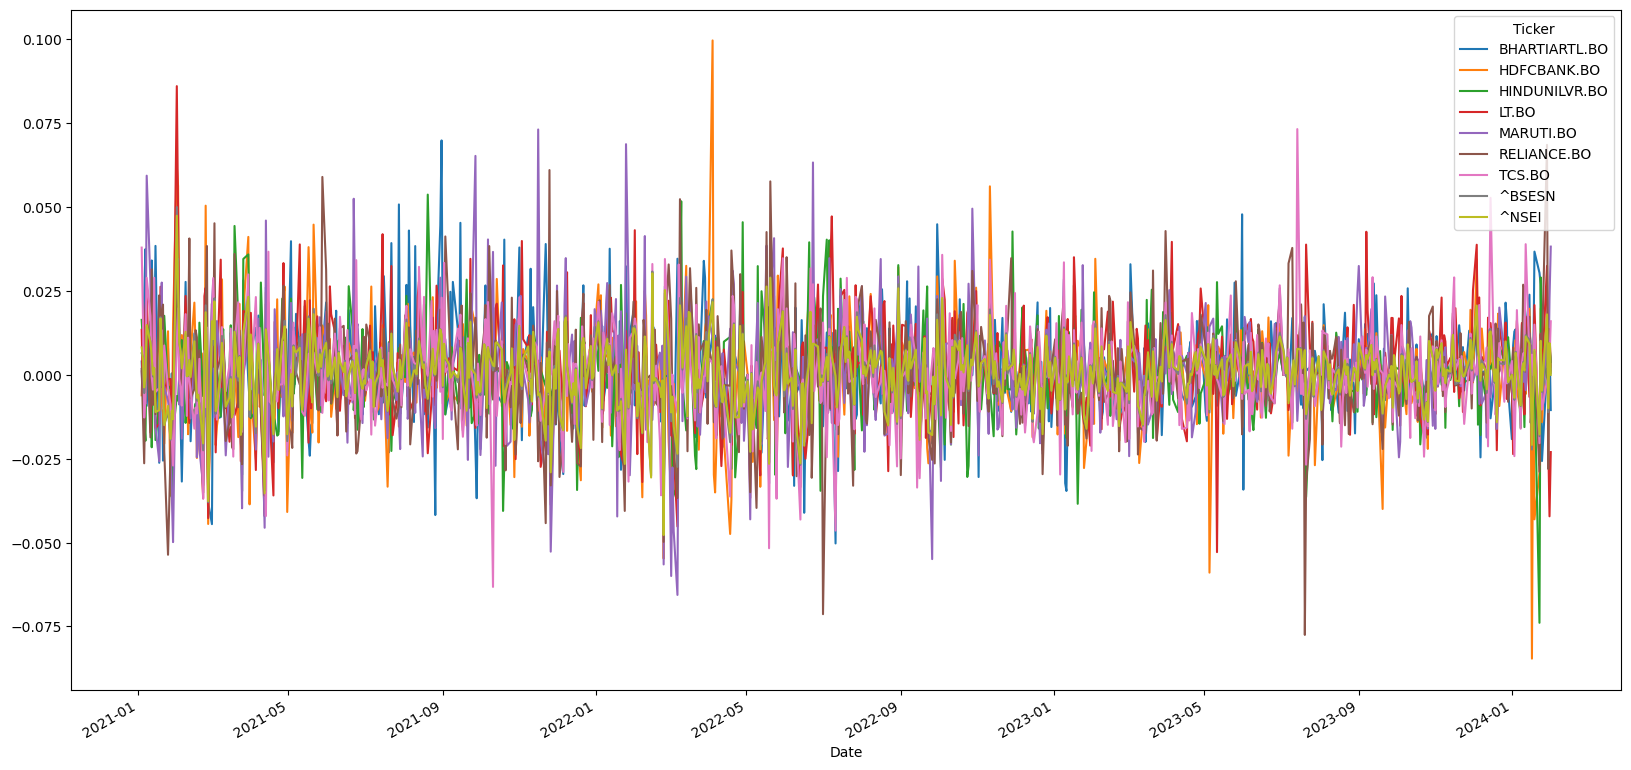

In [70]:
stocks_return.plot(figsize=(20,10))

In [71]:
oneyear=stocks.loc["2022-01-01":"2022-12-31"]

In [72]:
oneyear.head()

Ticker,BHARTIARTL.BO,HDFCBANK.BO,HINDUNILVR.BO,LT.BO,MARUTI.BO,RELIANCE.BO,TCS.BO,^BSESN,^NSEI
Date,,,,,,,,,
2022-01-03,691.200012,1519.699951,2362.550049,1922.099976,7519.700195,2404.350098,3818.149902,59183.218750,17625.699219
2022-01-04,697.200012,1528.400024,2401.949951,1938.050049,7627.649902,2457.750000,3882.699951,59855.929688,17805.250000
2022-01-05,700.049988,1564.650024,2415.449951,1948.150024,7773.549805,2466.050049,3861.050049,60223.148438,17925.250000
2022-01-06,710.250000,1539.900024,2392.550049,1925.199951,7879.100098,2416.600098,3806.850098,59601.839844,17745.900391
2022-01-07,704.750000,1550.400024,2416.500000,1904.750000,7907.500000,2435.949951,3854.850098,59744.648438,17812.699219


<Axes: xlabel='Date'>

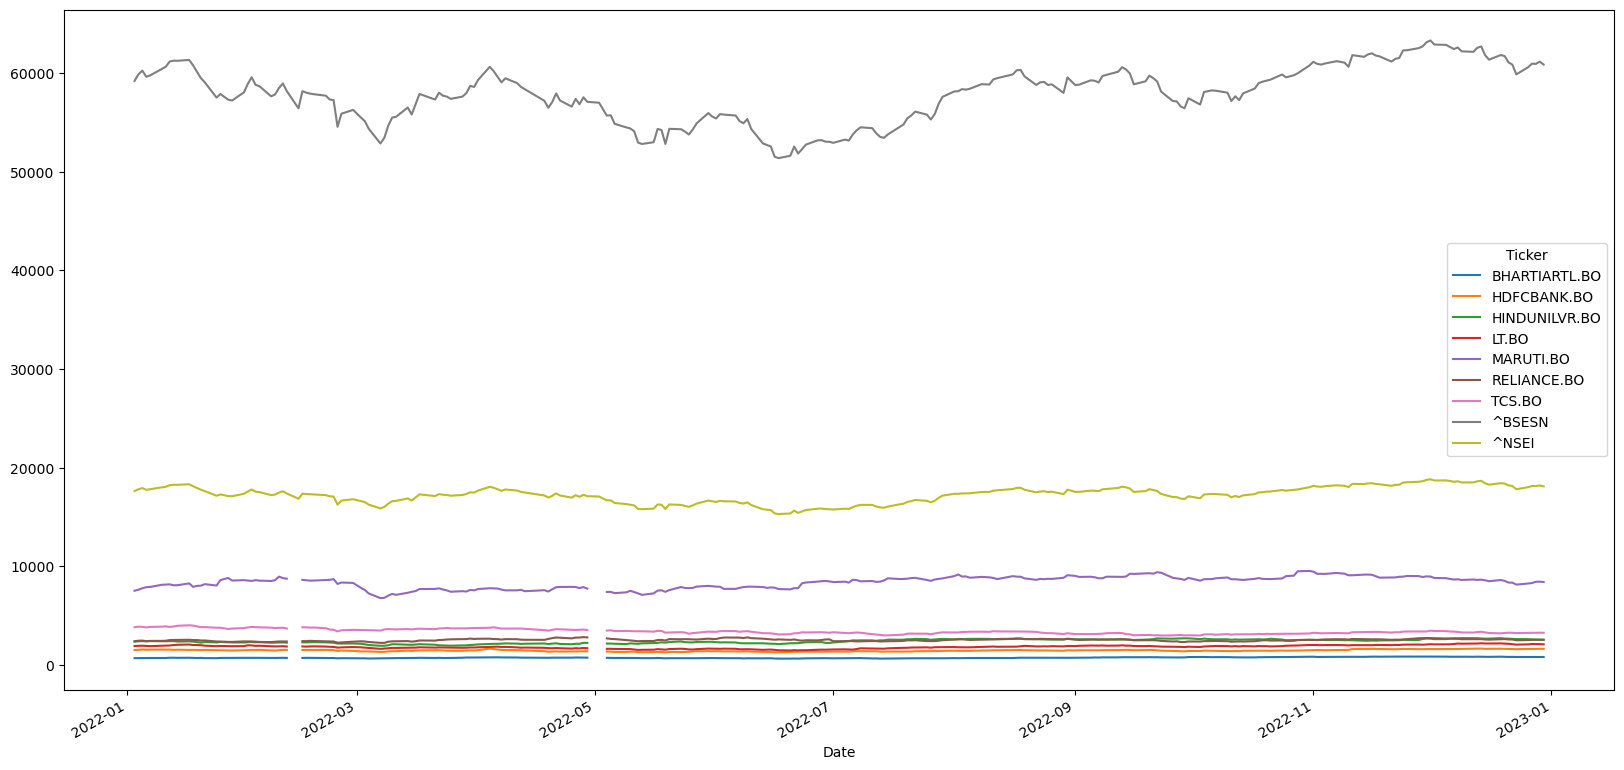

In [73]:
oneyear.plot(figsize=(20,10))

In [74]:
stocks_return_cumulative=(stocks_return+1).cumprod()

<Axes: xlabel='Date'>

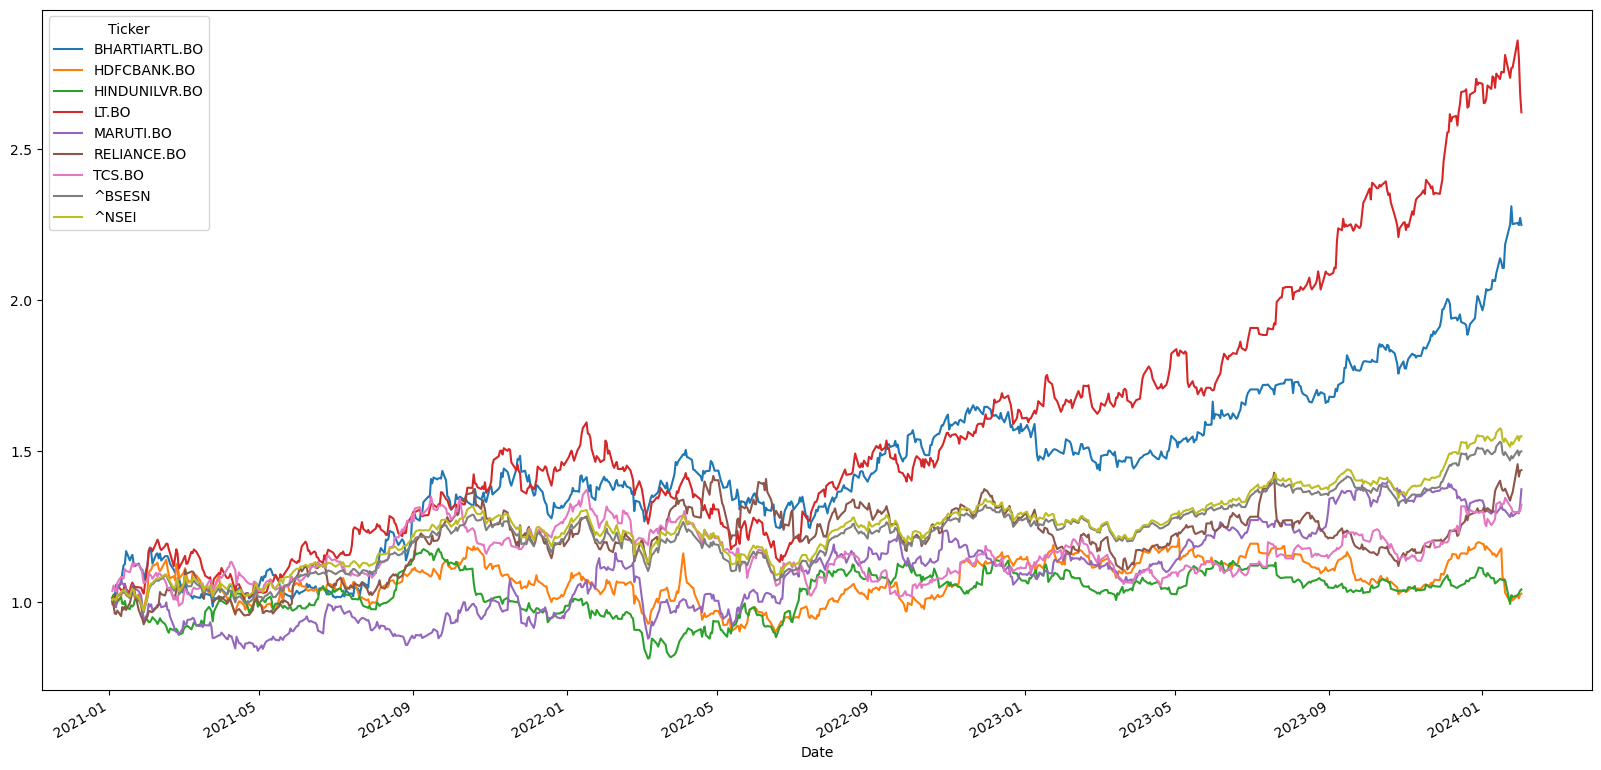

In [75]:
stocks_return_cumulative.plot(figsize=(20,10))

In [76]:
stocks_return.describe()

Ticker,BHARTIARTL.BO,HDFCBANK.BO,HINDUNILVR.BO,LT.BO,MARUTI.BO,RELIANCE.BO,TCS.BO,^BSESN,^NSEI
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,0.001172,0.000140,0.000137,0.001372,0.000530,0.000593,0.000456,0.000576,0.000618
std,0.014692,0.014379,0.012816,0.014612,0.015025,0.015277,0.013248,0.009323,0.009224
min,-0.050270,-0.084606,-0.073925,-0.052857,-0.065617,-0.077535,-0.063223,-0.047214,-0.047781
25%,-0.007581,-0.006719,-0.006556,-0.007218,-0.006993,-0.008255,-0.006273,-0.004431,-0.004407
50%,0.000000,0.000000,0.000000,0.000546,0.000000,0.000739,0.000000,0.000631,0.000884
75%,0.009279,0.007125,0.006614,0.009928,0.007738,0.008667,0.007427,0.006264,0.006589
max,0.069880,0.099681,0.053722,0.086056,0.073136,0.068552,0.073251,0.050012,0.047424


<Axes: xlabel='Ticker', ylabel='Ticker'>

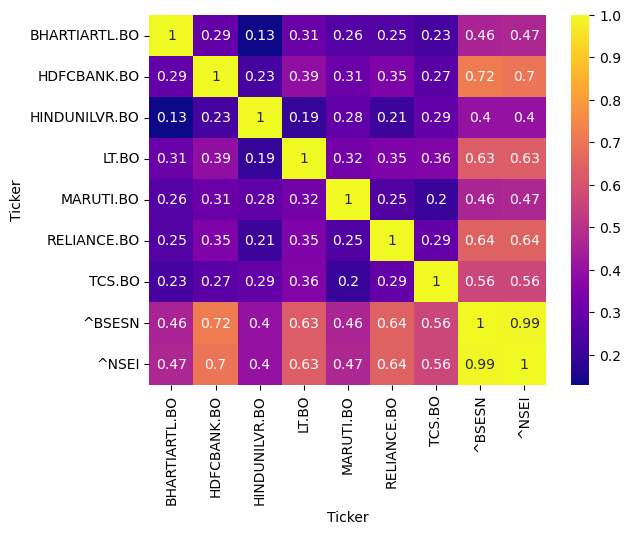

In [77]:
sns.heatmap(stocks_return.corr(),cmap="plasma",annot=True)

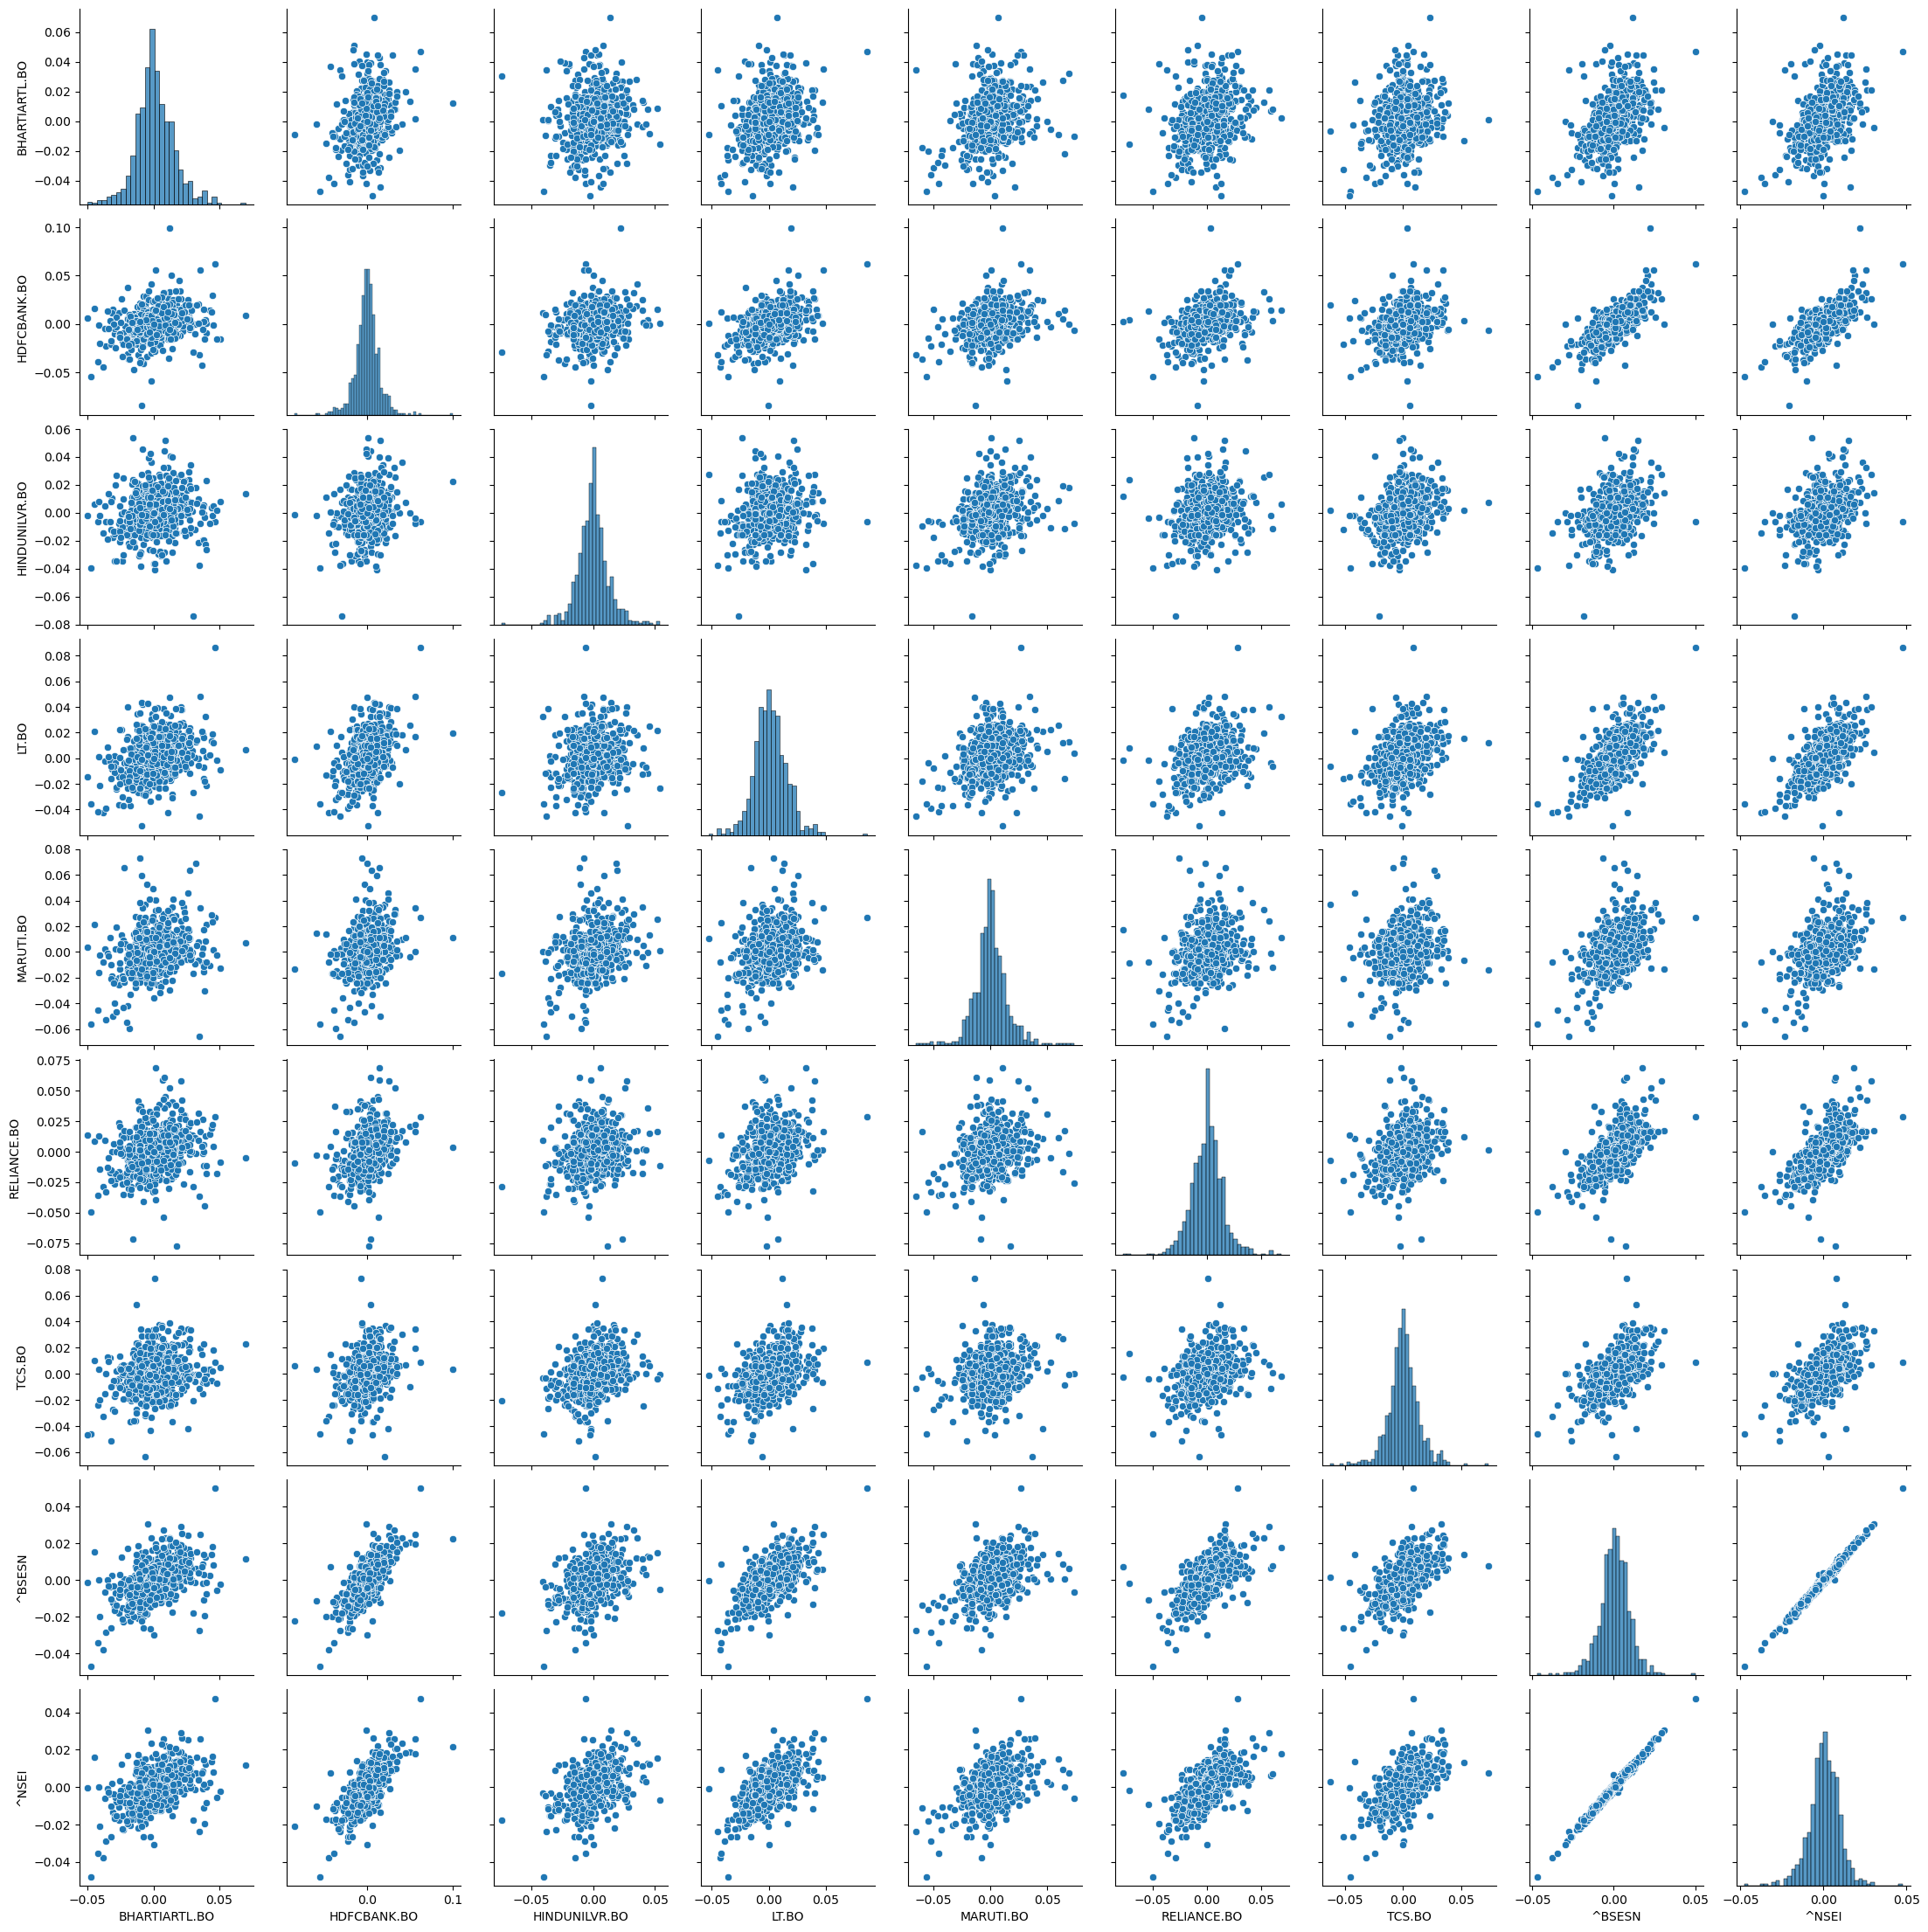

In [78]:
sns.pairplot(stocks_return)

In [79]:
import plotly.graph_objects as go

In [80]:
sensex=sensex.reset_index()

In [81]:
sensex['Date']=pd.to_datetime(sensex['Date'])

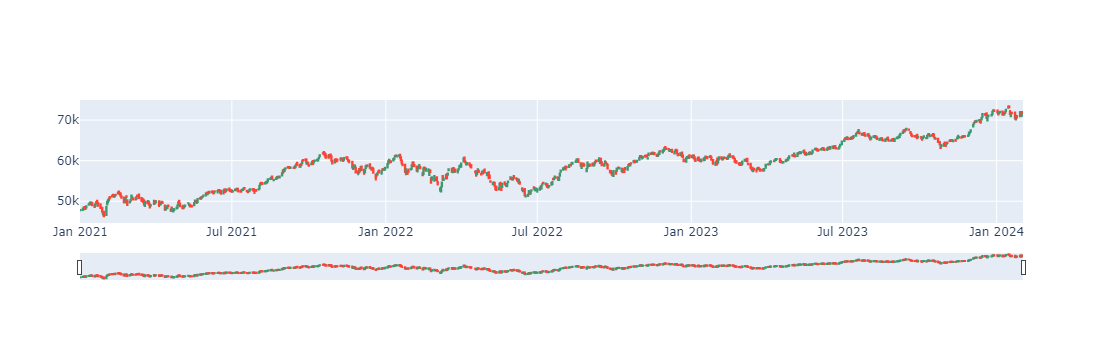

In [82]:

fig = go.Figure(data=[go.Candlestick(x=sensex['Date'],
                                     open=sensex['Open'],
                                     high=sensex['High'],
                                     low=sensex['Low'],
                                     close=sensex['Close'])])
fig.show()

In [85]:
stocks_return.columns

Index(['BHARTIARTL.BO', 'HDFCBANK.BO', 'HINDUNILVR.BO', 'LT.BO', 'MARUTI.BO',
       'RELIANCE.BO', 'TCS.BO', '^BSESN', '^NSEI'],
      dtype='object', name='Ticker')

In [91]:
stocks_return=stocks_return.dropna()

In [99]:
y=stocks_return['^NSEI']
x=stocks_return.drop(['^BSESN','^NSEI'],axis=1)

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,make_scorer

In [101]:
knn=KNeighborsRegressor()

In [102]:
grid_set={'n_neighbors':(1,30),'weights':['uniform','distance']}

In [103]:
scorer=make_scorer(mean_squared_error,greater_is_better=False)

In [104]:
grid_search_knn=GridSearchCV(estimator=knn,param_grid=grid_set,cv=5,scoring=scorer).fit(x,y)

In [105]:
grid_search_knn.best_params_

{'n_neighbors': 30, 'weights': 'uniform'}

In [107]:
grid_search_knn.best_score_

-2.240578852346231e-05